In [1]:
#Se importan los paquetes necesarios para los cálculos.
import pandas as pd #manejo de datos
import numpy as np #parquete de matemática
import scipy.stats as sp #paquete de estadísticas
from sqlalchemy import create_engine #consultas a sql
import sqlalchemy #manejo de sql
import sys #manejo del sistema para recibir argumentos
import warnings #
from sqlalchemy import text
warnings.filterwarnings("ignore")
import pyodbc

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import funciones
import comparacionfunciones as cp

In [2]:
ponderaciones = pd.read_excel('Ponderaciones_producto.xlsx', sheet_name='pond_suma')
ponderaciones = ponderaciones.rename(columns = {'REPUBLICA':'Republica_2010','REG. I':'01_2010', 'REG. II':'02_2010', 'REG. III':'03_2010', 'REG. IV':'04_2010', 'REG. V':'05_2010', 'REG. VI':'06_2010', 'REG. VII':'07_2010', 'REG. VIII':'08_2010'})
ponderaciones = ponderaciones.rename(columns = {'NACIONAL':'Republica_2023','REGION_1':'01_2023', 'REGION_2':'02_2023', 'REGION_3':'03_2023', 'REGION_4':'04_2023', 'REGION_5':'05_2023', 'REGION_6':'06_2023', 'REGION_7':'07_2023', 'REGION_8':'08_2023'})
ponderaciones['DESCRIPCION'] = ponderaciones['DESCRIPCION'].str.strip()
#ponderaciones

In [3]:
#numero = int(input('Ingrese el numero de datos a mostrar: '))
num = 15

Comparacion de diferencias entre ponderaciones

In [4]:
#se calculan las diferencias absolutas entre los ponderadores
colscomp = ['Republica', '01', '02', '03', '04', '05', '06', '07', '08']
diferencias = pd.DataFrame()
diferencias['DESCRIPCION'] = ponderaciones['DESCRIPCION']
for col in colscomp:
    diferencias[f'dif_{col}'] = (ponderaciones[f'{col}_2023'] - ponderaciones[f'{col}_2010'])
diferencias

,DESCRIPCION,dif_Republica,dif_01,dif_02,dif_03,dif_04,dif_05,dif_06,dif_07,dif_08
0,ARROZ,-0.110073,-0.032549,-0.098348,-0.233983,-0.080134,-0.129394,-0.271057,-0.125391,-0.150531
1,HARINA,0.054850,0.056449,0.075565,-0.200544,0.065857,-0.029075,0.016800,0.243606,0.106150
2,MAÍZ,-0.625623,-0.025904,-1.523744,-0.528197,-0.684386,-0.792018,-1.374871,-1.593726,-0.688216
3,CEREALES,-0.739403,-0.183720,-1.400886,-0.697625,-1.015568,-0.640016,-1.175159,-1.359794,-1.099074
4,PAN,-0.463166,-0.349701,-0.553111,-0.813526,-0.647594,-0.722992,-0.122699,-0.294772,-0.365124
...,...,...,...,...,...,...,...,...,...,...
274,SERVICIO DE EMISIÓN DE CERTIFICADO DE TODO TIPO,0.023708,0.041369,0.054441,0.053768,0.051205,0.068393,0.047181,0.028172,0.033042
275,SERVICIO DE FOTOCOPIADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,SERVICIO NOTARIAL,0.000201,0.022189,-0.049941,0.018024,-0.025593,-0.000743,-0.003077,0.001291,0.140992
277,SERVICIO FUNERARIO,0.009768,-0.032806,0.043468,-0.032057,0.021515,0.166163,0.132729,0.059685,-0.130395


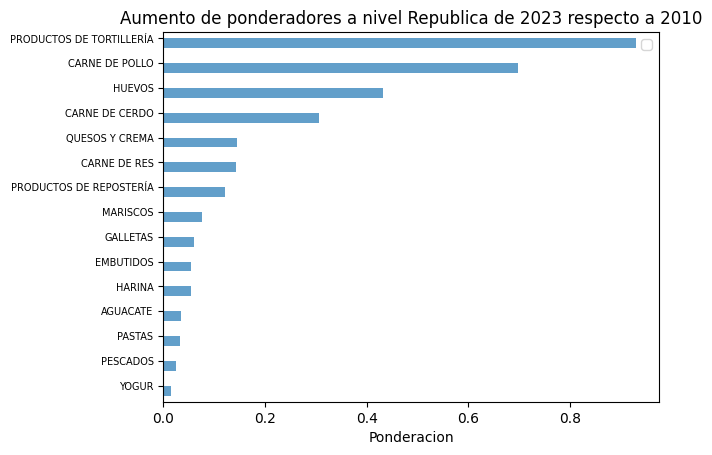

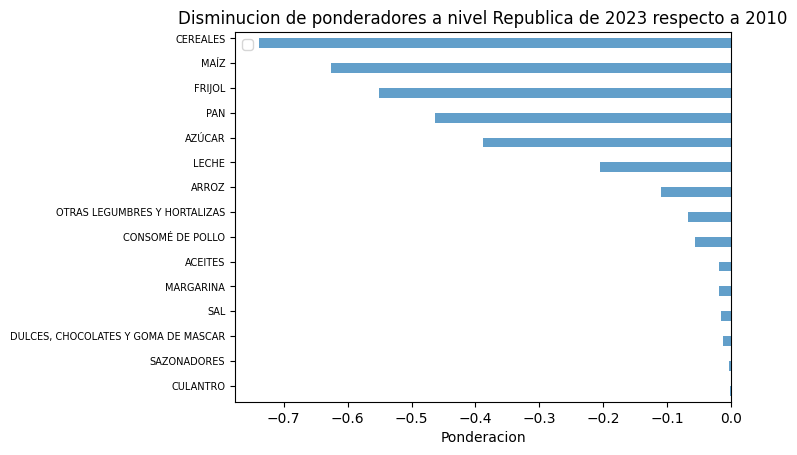

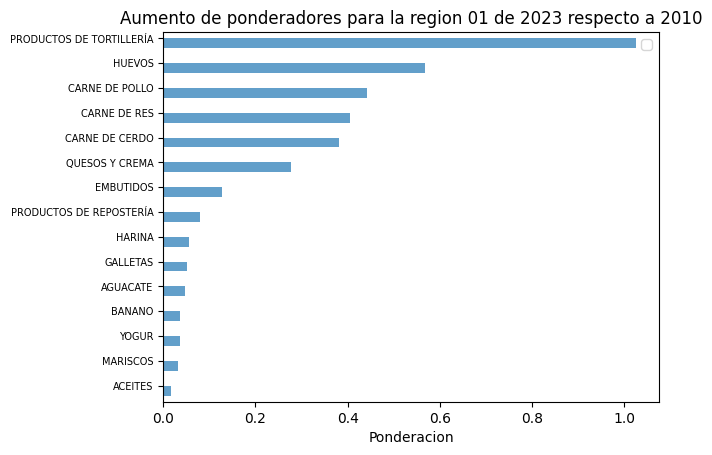

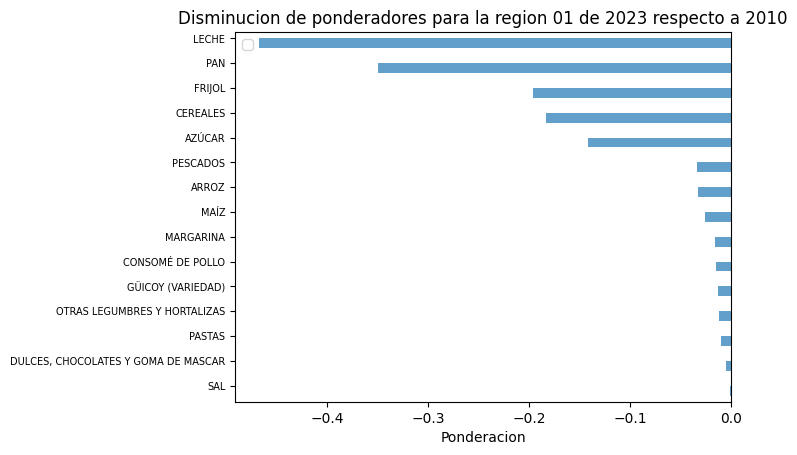

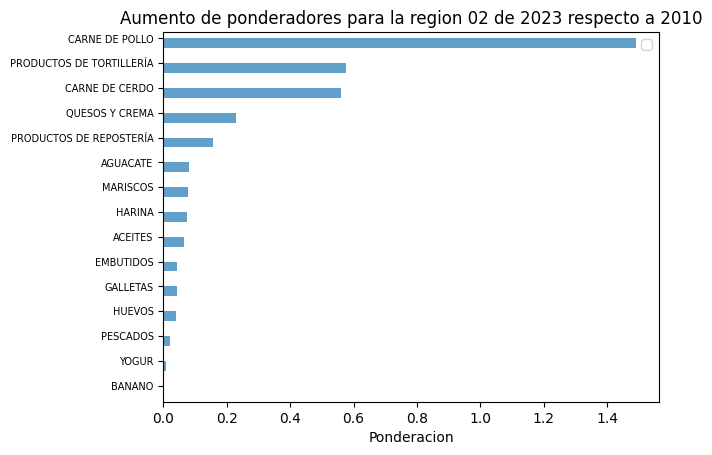

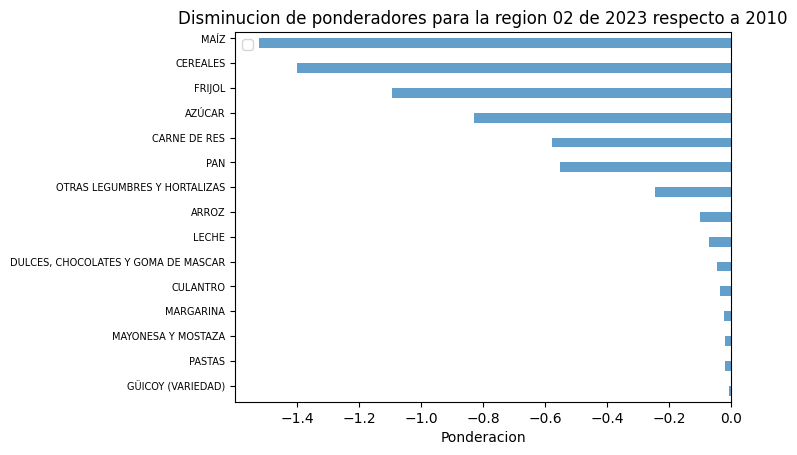

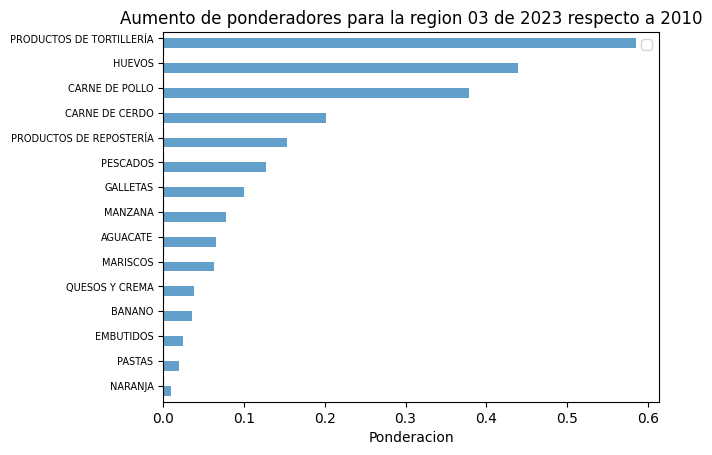

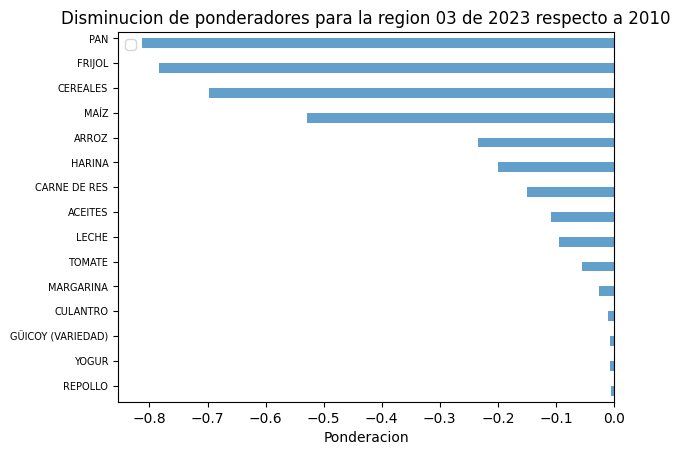

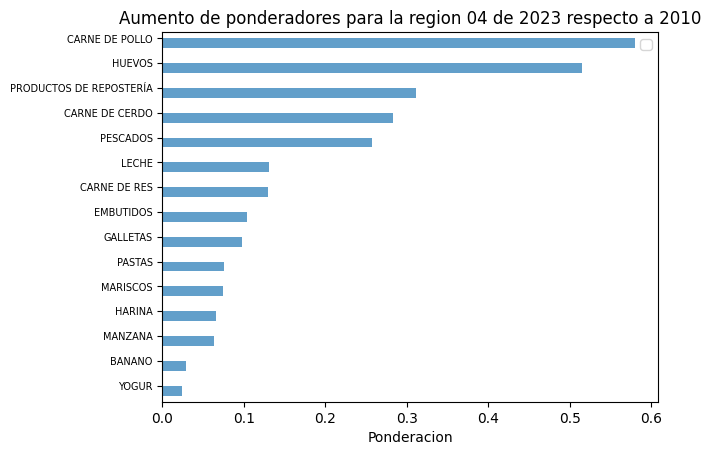

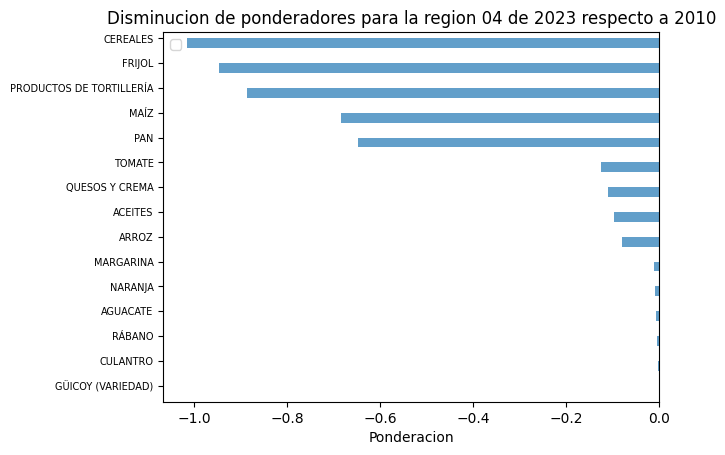

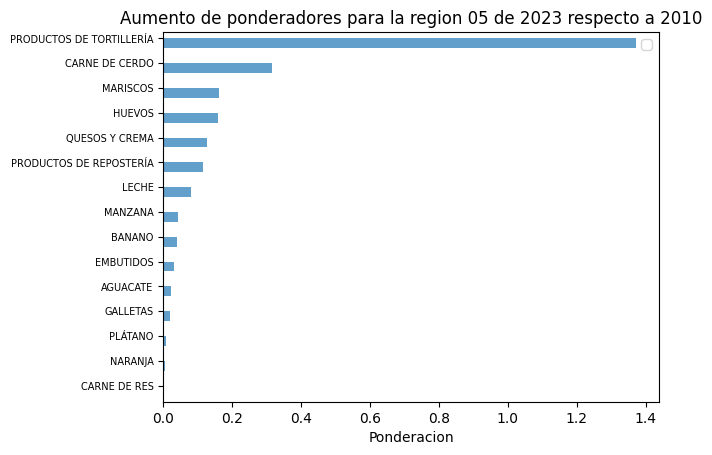

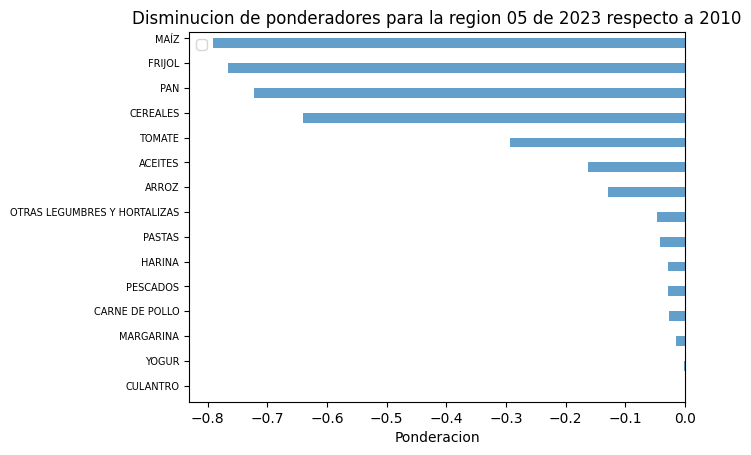

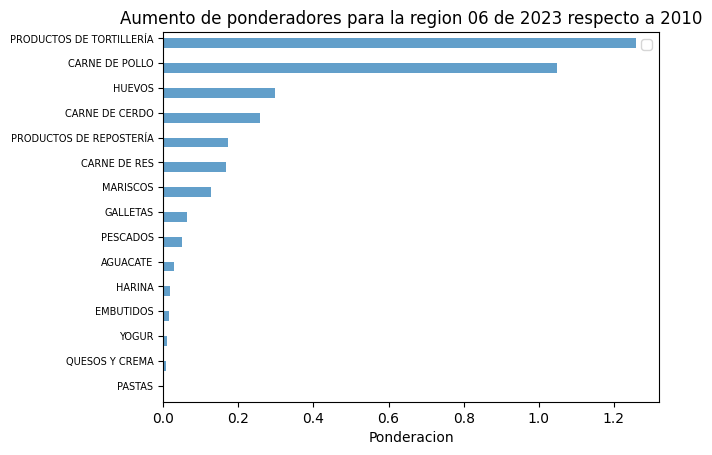

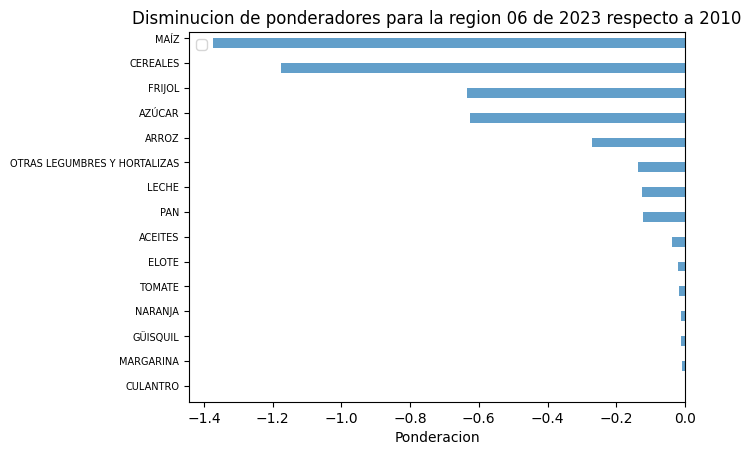

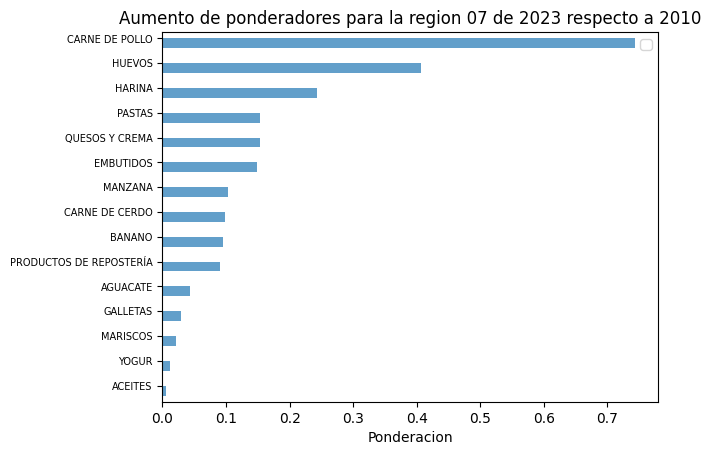

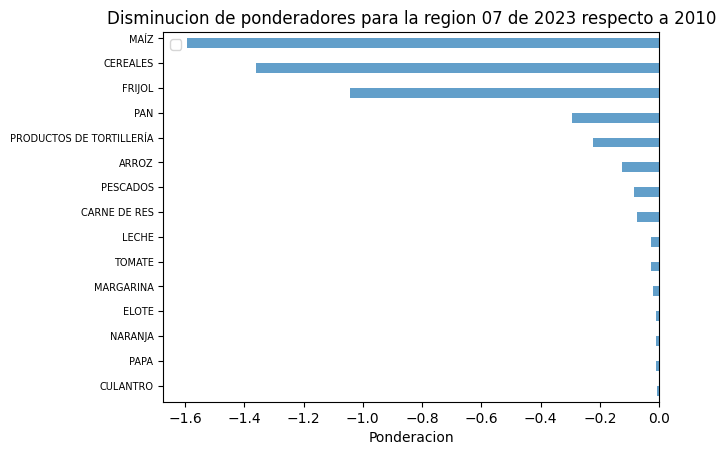

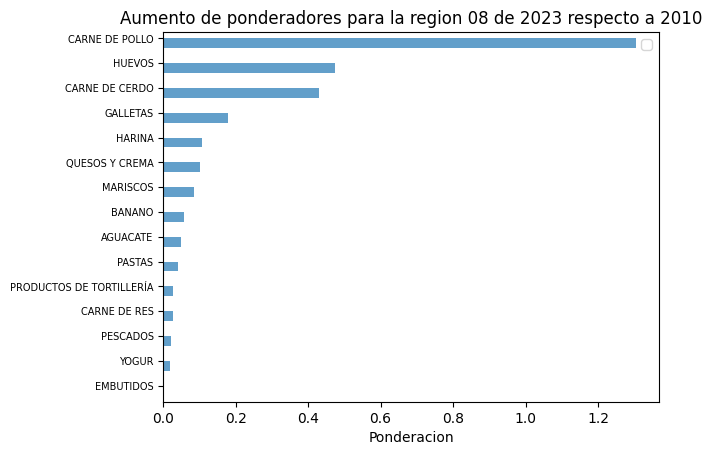

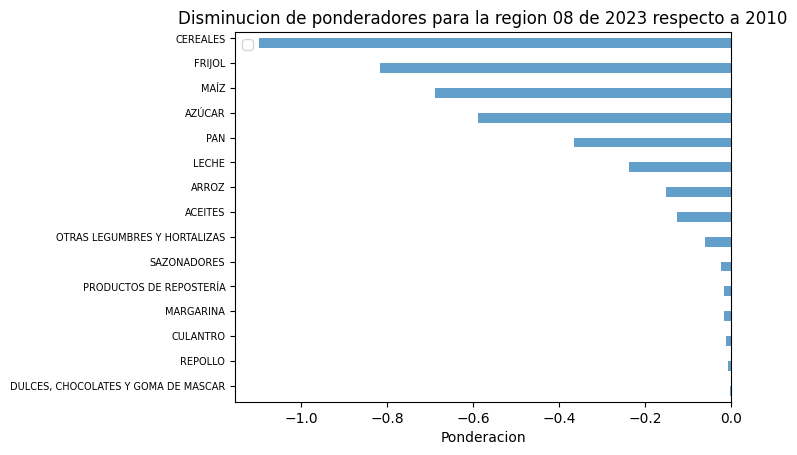

In [5]:
for col in colscomp:
    cp.grafdif(col, diferencias, num)

Comparacion de las ponderaciones

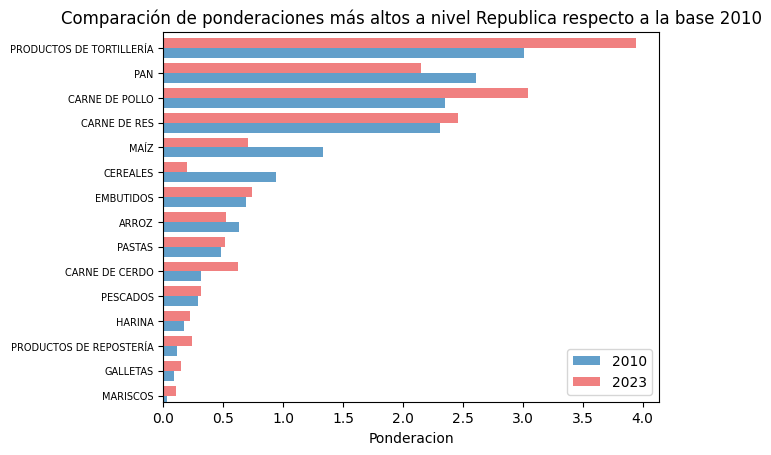

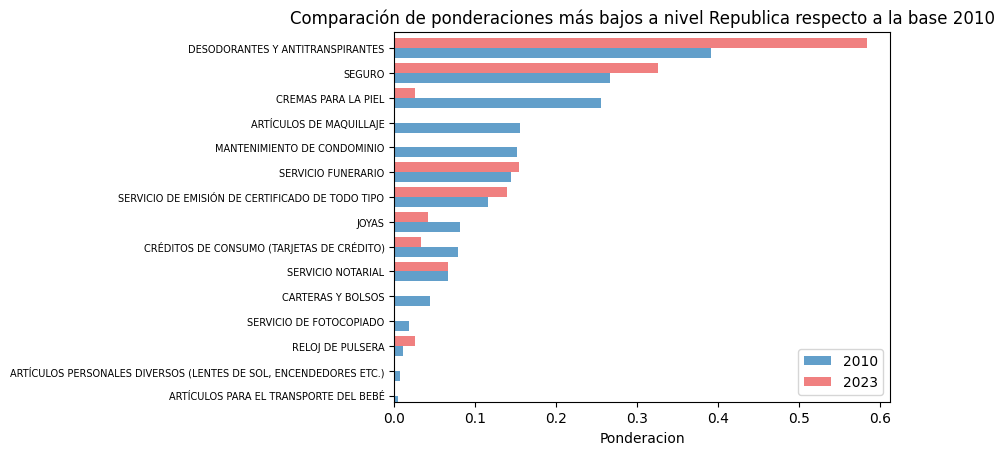

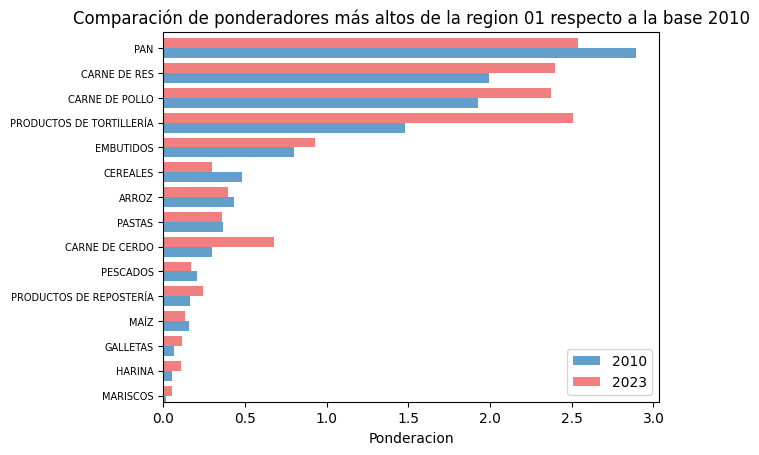

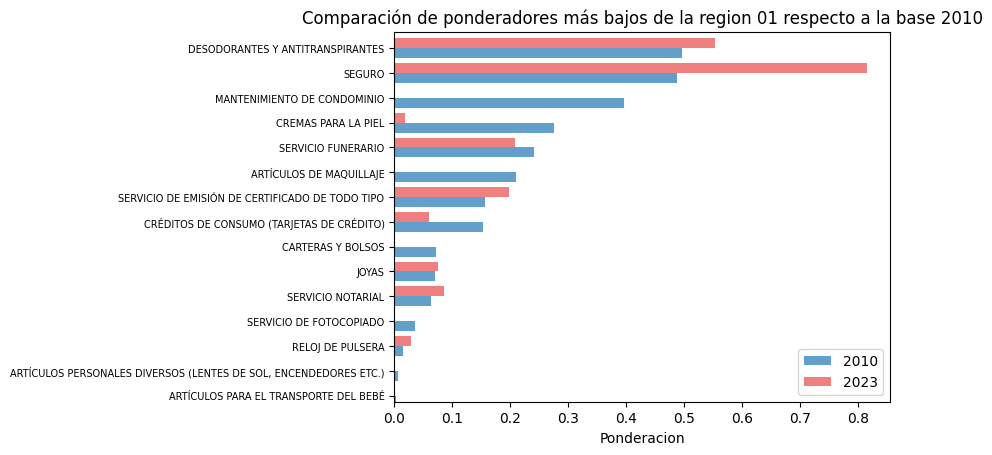

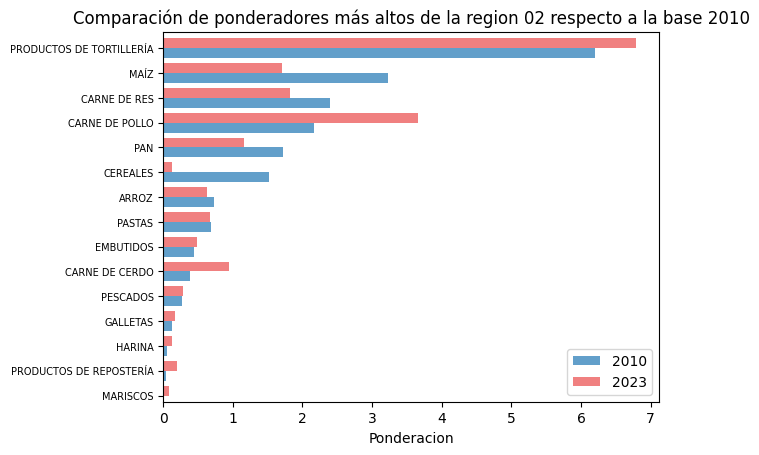

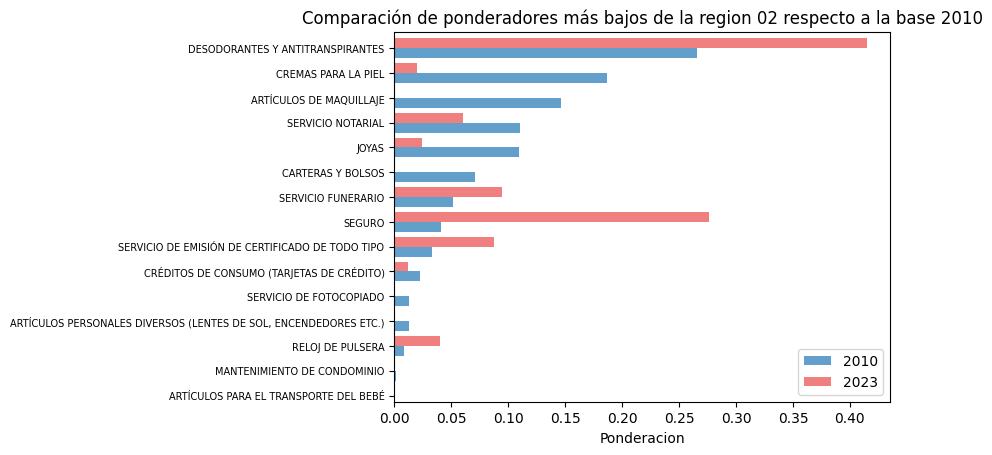

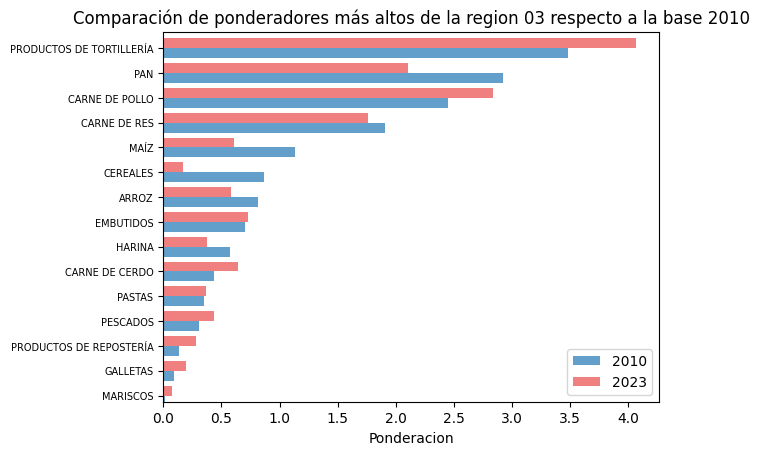

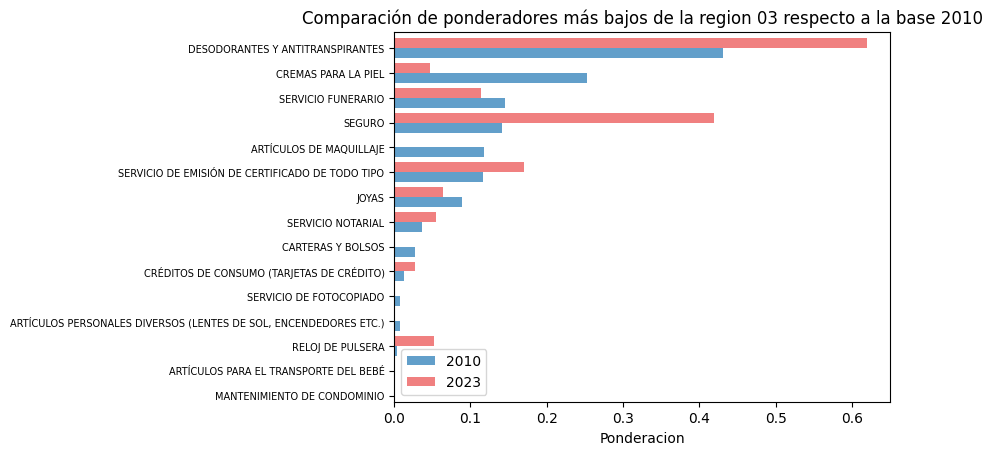

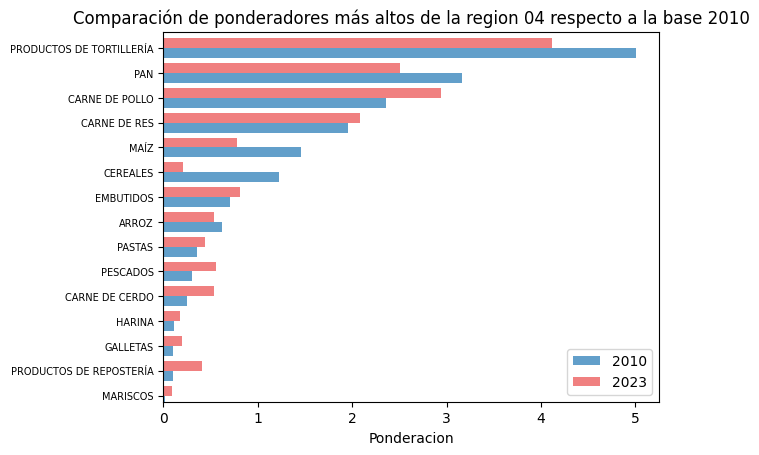

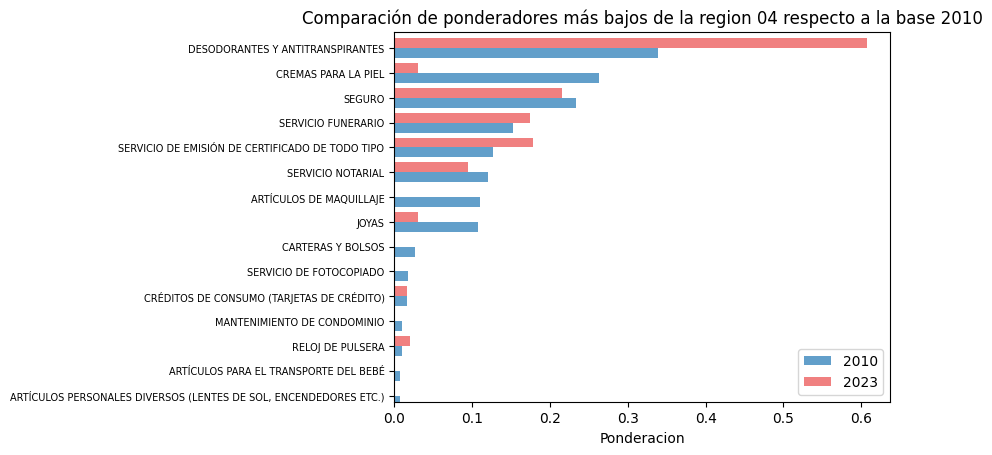

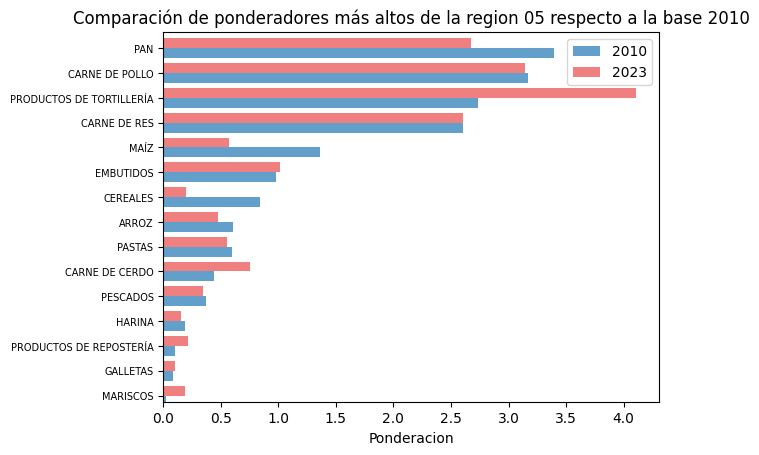

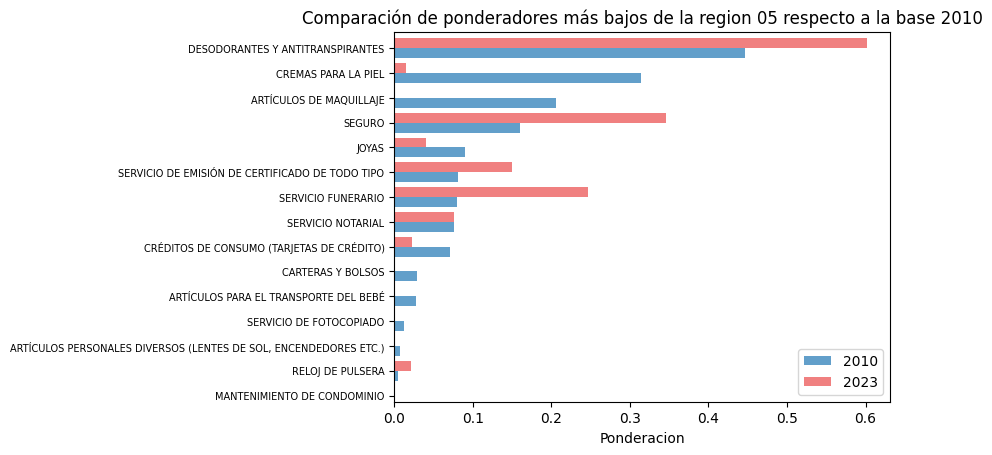

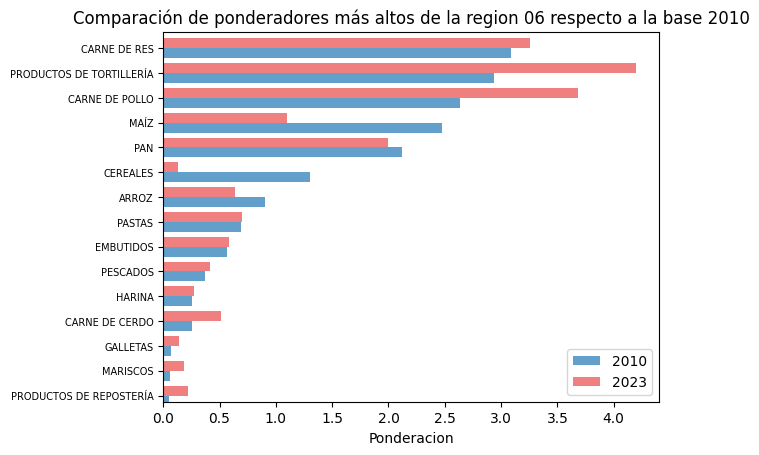

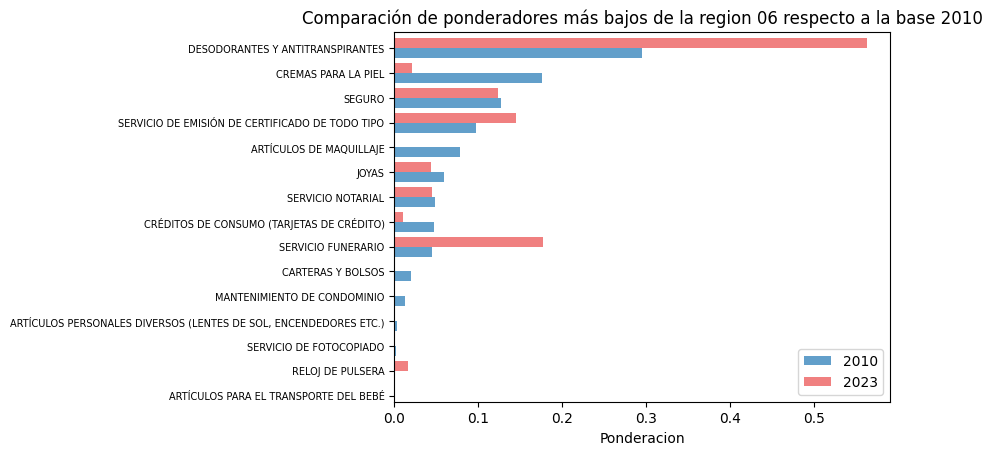

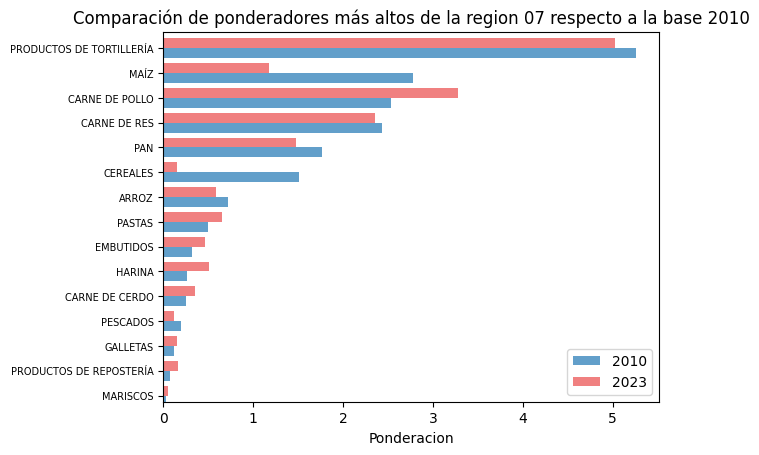

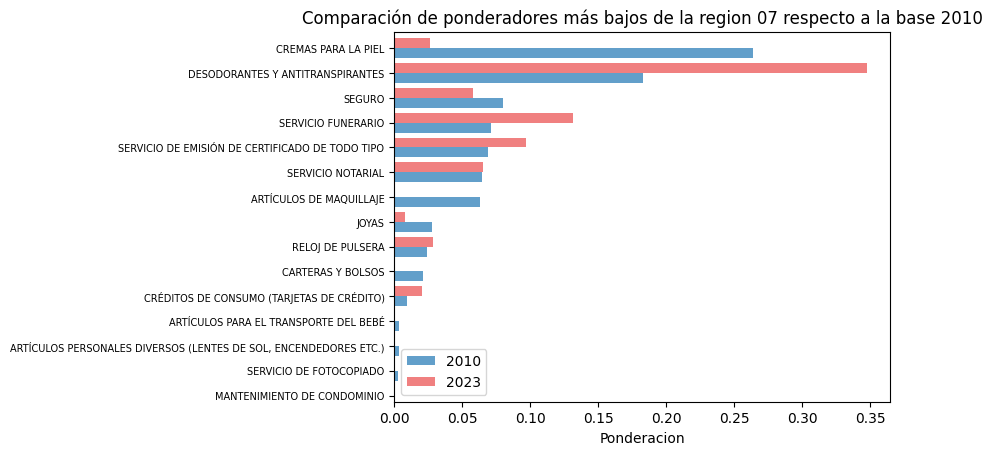

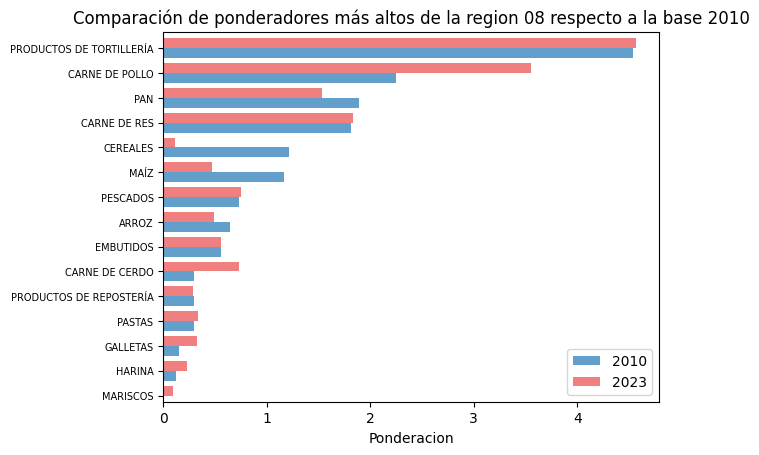

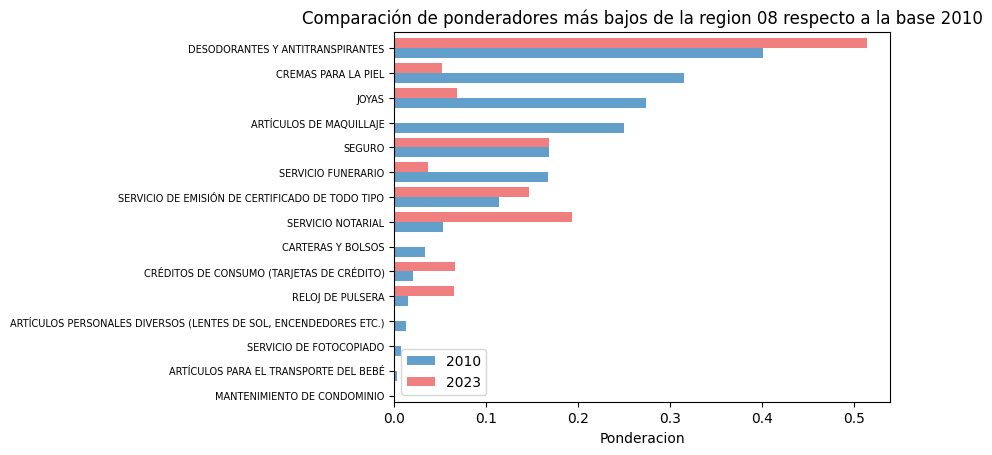

In [9]:
for regcod in colscomp:
    cp.graf_regpon(regcod, ponderaciones, num)